# Line of sight integration in Galactic / Galactocentric coordinates

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gammapy.maps import Map
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
# define a 3d scalar field
def emissivity(x, y, z):
    r = np.sqrt(x ** 2 + y ** 2)
    r_z = 0.5 * z
    rho = np.ones(r.shape) * u.Unit("cm-3 sr-1 s-1")
    rho[r > r_z] = 0
    return rho

In [4]:
# define sky map and get coordinates
m_wcs = Map.create(map_type="wcs", coordsys="GAL", binsz=0.1, width=(10, 10))
skycoords = m_wcs.geom.get_coord().skycoord

In [5]:
lat = skycoords.galactic.b
lon = skycoords.galactic.l.wrap_at("180d")

distance = np.linspace(5, 20, 1000)[:, np.newaxis, np.newaxis] * u.kpc

coords = SkyCoord(lon, lat, distance=distance, frame="galactic")

In [6]:
c = coords.transform_to("galactocentric")
rho = emissivity(c.x, c.y, c.z)

In [7]:
integral = np.trapz(rho, x=distance, axis=0) * m_wcs.geom.solid_angle()

In [8]:
m_wcs.data = integral.to_value("cm-2 s-1")

(<matplotlib.figure.Figure at 0x7f9f6c4384e0>,
 None)

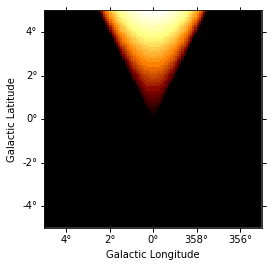

In [9]:
m_wcs.plot()